In [88]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [89]:
os.chdir('D:\Imarticus\ML')

In [90]:
os.listdir()

['4kvideodownloader_4.20.1_x64_online.exe',
 'ambardarviresh18@gmail.com_LinearRegg.ipynb',
 'archive.zip',
 'aw_fb_data.csv',
 'cars_modified.csv',
 'car_done.csv',
 'Car_sales.csv',
 'Chi-Sq Test.ipynb',
 'Churn_Modelling.csv',
 'cr.csv',
 'data_for_weka_aw.csv',
 'data_for_weka_fb.csv',
 'dfeval.csv',
 'dftrain.csv',
 'Fish_dataset.csv',
 'fitbit.csv',
 'linerRegg (1).ipynb',
 'linerRegg.ipynb',
 'LoansData.csv',
 'Loan_data (1).ipynb',
 'loan_modified.csv',
 'New Season.jpg',
 'PGA20_ML_Notes.xlsx',
 'prde_train1.xlsx',
 'supermarket_sales - Sheet1.csv',
 'Supunky gamer 0518.png',
 'temp20220318-39649-1q8i4xq.png',
 'temp20220318-39649-1q8i4xq.v3.jpg',
 'Test_RiskScore.xlsx',
 'tkf.mp4',
 'trainprofile.xlsx',
 'train_profile.xlsx',
 'Train_RiskScore.csv',
 'vehicles.csv',
 'Viresh-sgd.ipynb',
 'xAPI-Edu-Data.csv']

In [91]:
schooldata = pd.read_csv('xAPI-Edu-Data.csv')
schooldata.drop(axis=1 , inplace=True , columns='GradeID')
schooldata.head()

,gender,NationalITy,PlaceofBirth,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [92]:
schooldata.isnull().sum().sort_values(ascending=False)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [93]:
schooldata.describe(percentiles=[.01,.02,.03,0.04,.05,.1,0.15,.25,0.75,0.85,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,50%,75%,85%,90%,95%,96%,97%,98%,99%,max
raisedhands,480.0,46.775000,30.779223,0.0,0.0,1.00,2.00,3.00,4.95,9.0,...,50.0,75.0,80.0,87.0,90.0,92.0,95.0,97.42,100.00,100.0
VisITedResources,480.0,54.797917,33.080007,0.0,0.0,2.00,2.00,3.00,4.00,7.0,...,65.0,84.0,90.0,90.0,95.0,96.0,97.0,98.00,98.00,99.0
AnnouncementsView,480.0,37.918750,26.611244,0.0,0.0,0.58,1.37,2.00,2.00,5.0,...,33.0,58.0,73.0,79.1,83.0,85.0,86.0,89.00,93.42,98.0
Discussion,480.0,43.283333,27.637735,1.0,2.0,3.00,4.00,5.16,7.00,10.0,...,39.0,70.0,80.0,84.0,90.0,90.0,92.0,94.42,97.00,99.0


# No outliers so far

# Univarient analysis


### Q.1 Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<AxesSubplot:>

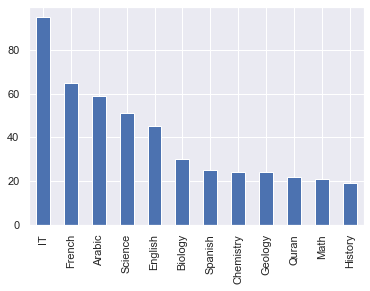

In [94]:
schooldata['Topic'].value_counts().plot(kind='bar')

In [95]:
df =schooldata
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [96]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

<AxesSubplot:>

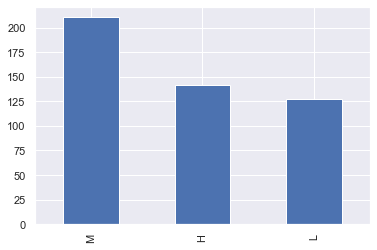

In [97]:
df['Class'].value_counts().plot(kind='bar')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   SectionID                 480 non-null    object
 5   Topic                     480 non-null    object
 6   Semester                  480 non-null    object
 7   Relation                  480 non-null    object
 8   raisedhands               480 non-null    int64 
 9   VisITedResources          480 non-null    int64 
 10  AnnouncementsView         480 non-null    int64 
 11  Discussion                480 non-null    int64 
 12  ParentAnsweringSurvey     480 non-null    object
 13  ParentschoolSatisfaction  480 non-null    object
 14  StudentAbsenceDays        

<AxesSubplot:>

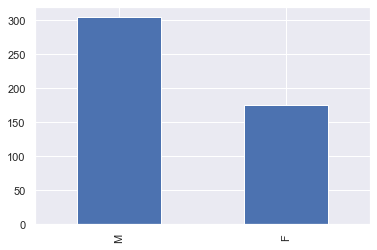

In [99]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

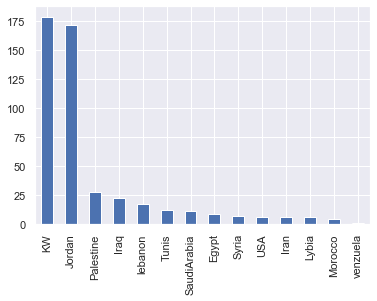

In [100]:
df["NationalITy"].value_counts().plot(kind='bar')

In [101]:
df['StageID'].unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

<AxesSubplot:>

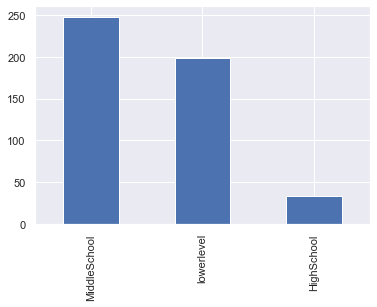

In [102]:
df['StageID'].value_counts().plot(kind='bar')

In [103]:
df['SectionID'].unique() 

array(['A', 'B', 'C'], dtype=object)

<AxesSubplot:>

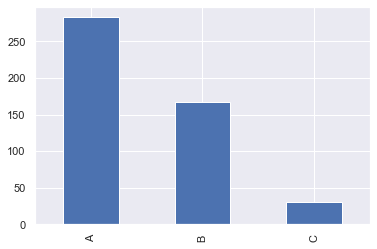

In [104]:
df['SectionID'].value_counts().plot(kind='bar')

In [105]:
df["Topic"].nunique()

12

<AxesSubplot:>

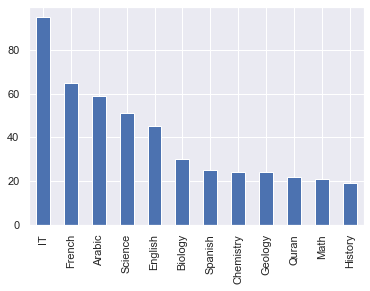

In [106]:
df["Topic"].value_counts().plot(kind='bar')

<AxesSubplot:>

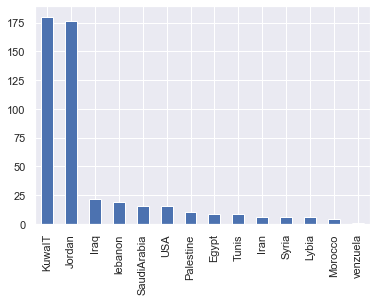

In [107]:
df["PlaceofBirth"].value_counts().plot(kind="bar")

In [108]:
df["Semester"].value_counts()

F    245
S    235
Name: Semester, dtype: int64

<AxesSubplot:>

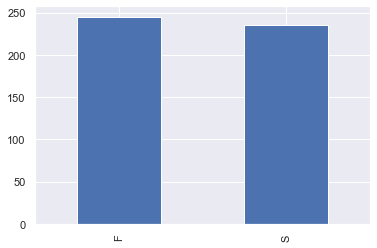

In [109]:
df["Semester"].value_counts().plot(kind="bar")

<AxesSubplot:>

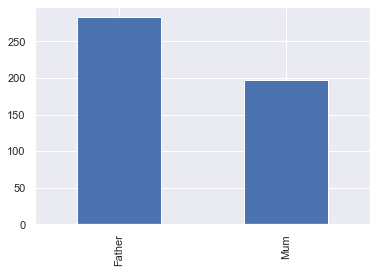

In [110]:
df["Relation"].value_counts().plot(kind="bar")

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64


<AxesSubplot:>

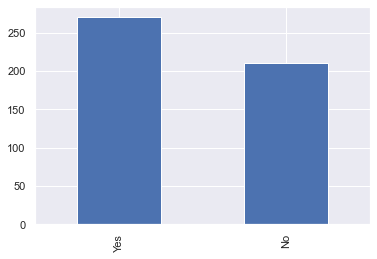

In [111]:
print(df["ParentAnsweringSurvey"].value_counts())
df["ParentAnsweringSurvey"].value_counts().plot(kind="bar")

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64


<AxesSubplot:>

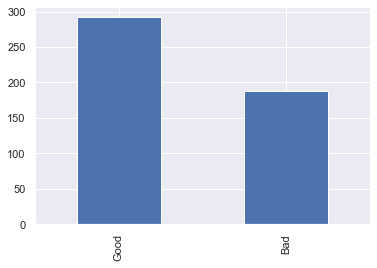

In [112]:
print(df["ParentschoolSatisfaction"].value_counts())
df["ParentschoolSatisfaction"].value_counts().plot(kind="bar")

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64


<AxesSubplot:>

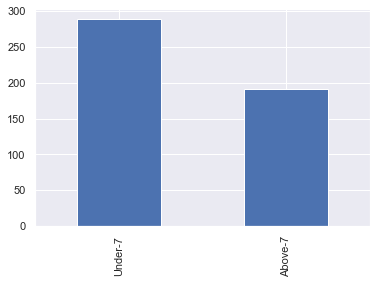

In [113]:
print(df["StudentAbsenceDays"].value_counts())
df["StudentAbsenceDays"].value_counts().plot(kind="bar")

M    211
H    142
L    127
Name: Class, dtype: int64


<AxesSubplot:>

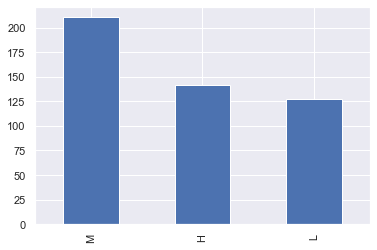

In [114]:
print(df["Class"].value_counts())
df["Class"].value_counts().plot(kind="bar")

# Q.2 Look at some categorical features in relation to each other, to see what insights could be possibly read?

In [115]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [116]:
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


<AxesSubplot:xlabel='ParentAnsweringSurvey,Relation'>

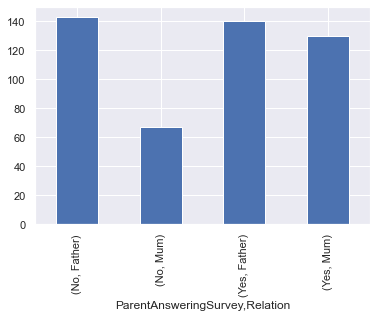

In [117]:
df.groupby(['ParentAnsweringSurvey']).Relation.value_counts() .plot(kind='bar')

<AxesSubplot:xlabel='NationalITy,gender'>

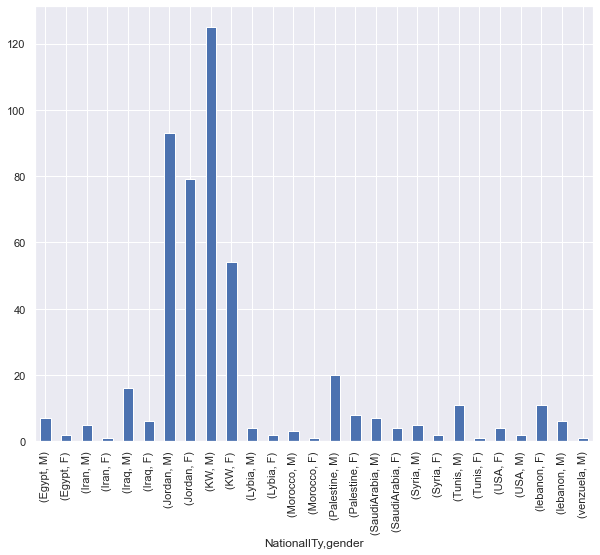

In [118]:
plt.figure(figsize=(10,8))
schooldata.groupby('NationalITy').gender.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='SectionID,gender'>

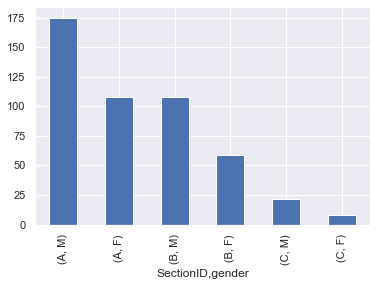

In [119]:
schooldata.groupby('SectionID')['gender'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='SectionID,Topic'>

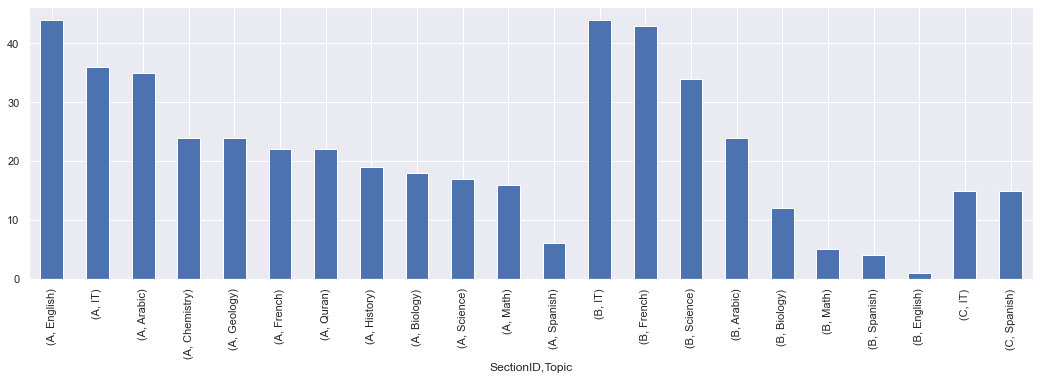

In [120]:
plt.figure(figsize=(18,5))
schooldata.groupby('SectionID')['Topic'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='gender,StageID'>

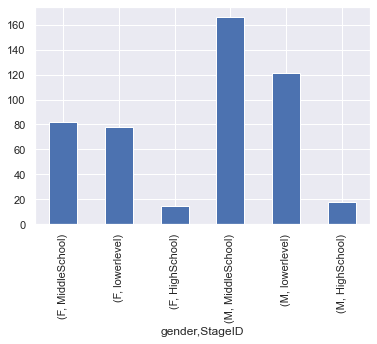

In [121]:
schooldata.groupby('gender').StageID.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Relation,ParentAnsweringSurvey'>

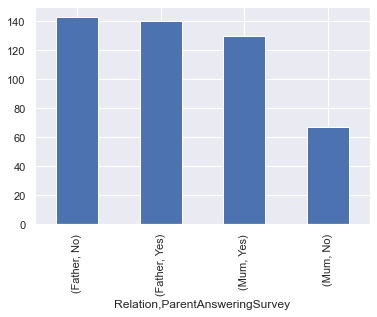

In [122]:
schooldata.groupby('Relation').ParentAnsweringSurvey.value_counts().plot(kind='bar')

In [123]:
df['Semester'].unique()

array(['F', 'S'], dtype=object)

<AxesSubplot:xlabel='Semester,gender'>

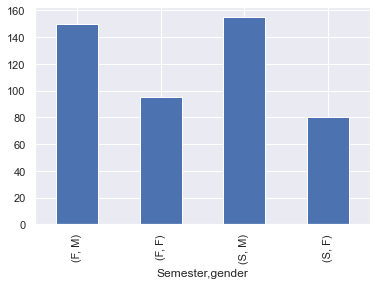

In [124]:
schooldata.groupby('Semester').gender.value_counts().plot(kind='bar')

## Q3. Visualize categorical variables with numerical variables and give conclusions?

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   SectionID                 480 non-null    object
 5   Topic                     480 non-null    object
 6   Semester                  480 non-null    object
 7   Relation                  480 non-null    object
 8   raisedhands               480 non-null    int64 
 9   VisITedResources          480 non-null    int64 
 10  AnnouncementsView         480 non-null    int64 
 11  Discussion                480 non-null    int64 
 12  ParentAnsweringSurvey     480 non-null    object
 13  ParentschoolSatisfaction  480 non-null    object
 14  StudentAbsenceDays        

<AxesSubplot:xlabel='StageID', ylabel='raisedhands'>

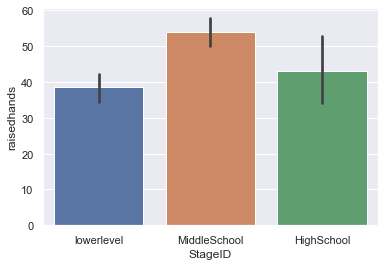

In [126]:
sns.barplot(x='StageID', y ='raisedhands', data = schooldata)

In [127]:
def viz(X,Y):
    sns.barplot(x=X, y = Y, data = schooldata , ci=False)

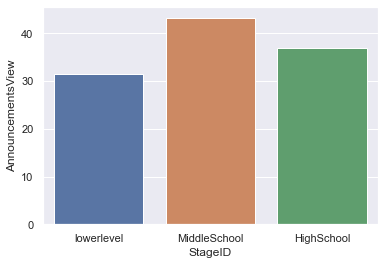

In [128]:
viz(df["StageID"],df["AnnouncementsView"])

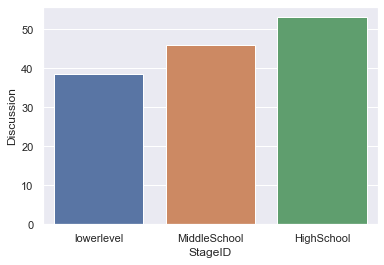

In [129]:
viz(df["StageID"],df["Discussion"])

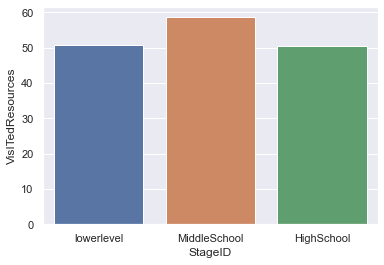

In [130]:
viz(df["StageID"],df["VisITedResources"])

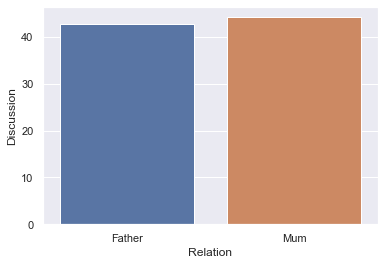

In [131]:
viz( df['Relation'],df['Discussion'])

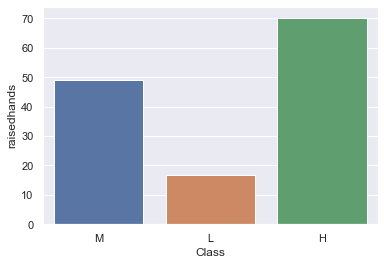

In [132]:
viz(df['Class'],df['raisedhands'])

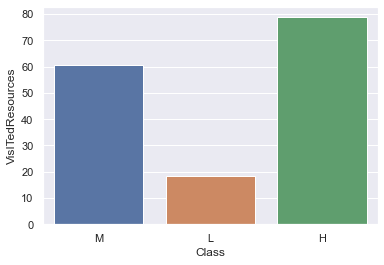

In [133]:
viz(df['Class'],df['VisITedResources'])

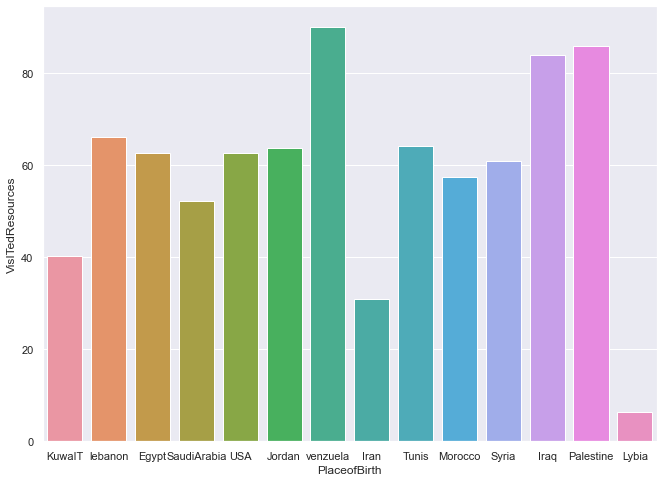

In [134]:
sns.set(rc={'figure.figsize':(11,8)})
viz(df['PlaceofBirth'],df['VisITedResources'])


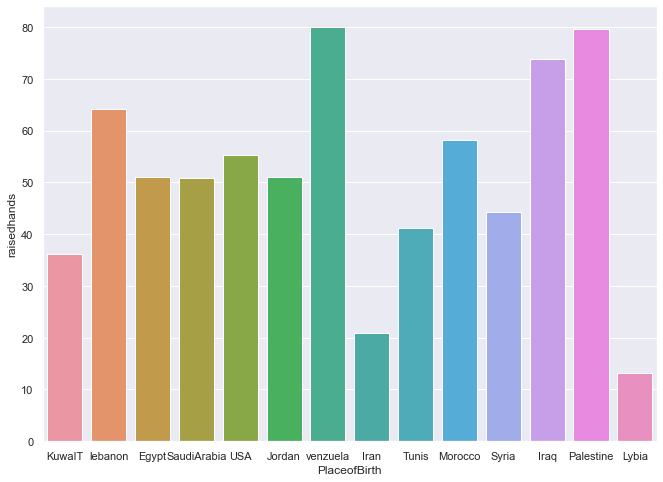

In [135]:
viz(df['PlaceofBirth'],df['raisedhands'])

## From the above result, what are the factors that leads to get ParentschoolSatisfaction score?

In [136]:
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


In [137]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

# converting y/desired variable into numerical term

In [138]:
df["NewParentschoolSatisfaction"]=np.where(df["ParentschoolSatisfaction"]=="Good",1,0)

In [139]:
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,NewParentschoolSatisfaction
0,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,1
1,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,1


In [140]:
df.drop(columns="ParentschoolSatisfaction", inplace=True)

# now we make dummies

In [141]:
df1=pd.get_dummies(df, columns=["gender","NationalITy","PlaceofBirth", "StageID", "SectionID", "Topic","Semester", "Relation", "ParentAnsweringSurvey","StudentAbsenceDays", "StudentAbsenceDays", "Class" ],drop_first=True)

In [142]:
df1.head(2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,NewParentschoolSatisfaction,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7,StudentAbsenceDays_Under-7,Class_L,Class_M
0,15,16,2,20,1,1,0,0,0,1,...,0,0,0,0,0,1,1,1,0,1
1,20,20,3,25,1,1,0,0,0,1,...,0,0,0,0,0,1,1,1,0,1


### Q.5 Build classification model and present it's classification report?

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   raisedhands                  480 non-null    int64
 1   VisITedResources             480 non-null    int64
 2   AnnouncementsView            480 non-null    int64
 3   Discussion                   480 non-null    int64
 4   NewParentschoolSatisfaction  480 non-null    int32
 5   gender_M                     480 non-null    uint8
 6   NationalITy_Iran             480 non-null    uint8
 7   NationalITy_Iraq             480 non-null    uint8
 8   NationalITy_Jordan           480 non-null    uint8
 9   NationalITy_KW               480 non-null    uint8
 10  NationalITy_Lybia            480 non-null    uint8
 11  NationalITy_Morocco          480 non-null    uint8
 12  NationalITy_Palestine        480 non-null    uint8
 13  NationalITy_SaudiArabia      480 non-null    uint8

In [145]:
y=df1["NewParentschoolSatisfaction"]
X=df1.drop(columns=["NewParentschoolSatisfaction"])

In [147]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=8)

logr = LogisticRegression(random_state=88)

In [148]:
print(x_train.info(), x_test.info())   # train-360  test-120

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 479 to 451
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   raisedhands                 360 non-null    int64
 1   VisITedResources            360 non-null    int64
 2   AnnouncementsView           360 non-null    int64
 3   Discussion                  360 non-null    int64
 4   gender_M                    360 non-null    uint8
 5   NationalITy_Iran            360 non-null    uint8
 6   NationalITy_Iraq            360 non-null    uint8
 7   NationalITy_Jordan          360 non-null    uint8
 8   NationalITy_KW              360 non-null    uint8
 9   NationalITy_Lybia           360 non-null    uint8
 10  NationalITy_Morocco         360 non-null    uint8
 11  NationalITy_Palestine       360 non-null    uint8
 12  NationalITy_SaudiArabia     360 non-null    uint8
 13  NationalITy_Syria           360 non-null    uint8
 14  National

In [149]:
logr.fit(x_train, y_train)

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [150]:
print("Train Accuracy", logr.score(x_train, y_train))

print("Test Accuracy", logr.score(x_test, y_test))

Train Accuracy 0.8277777777777777
Test Accuracy 0.8


In [151]:
pred_y_train=logr.predict(x_train)  

pred_y_test=logr.predict(x_test) 


In [152]:
metrics.classification_report(y_train, pred_y_train)

'              precision    recall  f1-score   support\n\n           0       0.80      0.72      0.76       135\n           1       0.84      0.89      0.87       225\n\n    accuracy                           0.83       360\n   macro avg       0.82      0.81      0.81       360\nweighted avg       0.83      0.83      0.83       360\n'

In [153]:
print(metrics.classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        53
           1       0.82      0.82      0.82        67

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120



In [154]:
    # 0        0.80      0.72      0.76       135    # train data clasification
    # 1        0.84      0.89      0.87       225

In [155]:
def profile_decile(X,y,trained_model):    # trained model is the one that we have created 
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)   # it will predict from the model 
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]  # then it will calculate the probability of the predicted model
    X_1["Y_actual"]=y_1       # it is the actual value
    X_1["Y_pred"]=y_pred1     # it is the predicted value
    
# decile analysis/ decile creation from the probability
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))   
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")   

# group by summary
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [156]:
metrics.confusion_matrix(y_train, pred_y_train)

array([[ 97,  38],
       [ 24, 201]], dtype=int64)

In [157]:
tot= 201+24
print("TPr", (201/(tot)))
print("FPr", (24/(tot)))

TPr 0.8933333333333333
FPr 0.10666666666666667


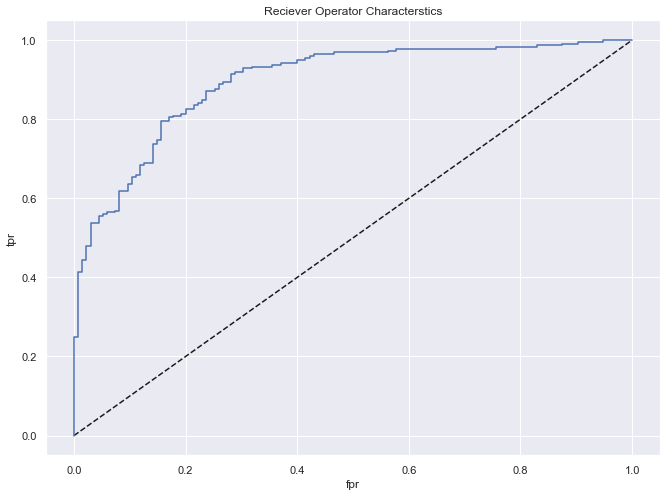

In [158]:
# ROC - Reciever Operator Characterstics
probs=logr.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr, label='logisticRegression')

plt.title("Reciever Operator Characterstics")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [159]:
metrics.roc_auc_score(y_train,probs)

0.8944855967078189

# Q.4-From-the-above-result,-what-are-the-factors-that-leads-to-get-low-grades-of-the-students?

# for this we use vif


In [160]:
x_train.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_M', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'SectionID_B', 'SectionID_C', 'Topic_Biology',
       'Topic_Chemistry', 'Topic_English', 'Topic_French', 'Topic_Geology',
       'Topic_History', 'Topic_IT', 'Topic_Math', 'Topic_Quran',
       'Topic_S

In [161]:
df2=df1.drop(columns=["NewParentschoolSatisfaction"])

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
y=df1["NewParentschoolSatisfaction"]

X=df1[["raisedhands" ,"VisITedResources", "AnnouncementsView" ,"Discussion"]]

vif = pd.DataFrame()

vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.sort_values('vif_value', ascending=False)

,vif_value,features
0,7.624493,raisedhands
1,6.893179,VisITedResources
2,6.075343,AnnouncementsView
3,3.365527,Discussion
